### Importing Necessary Library and doing some basic checks on data

In [134]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

### Merge All The Files Together

In [135]:
files=[file for file in os.listdir("./Sales" )]
all_data=pd.DataFrame()

for file in files:
    df=pd.read_csv("./Sales/"+file)
    all_data=pd.concat([all_data,df])
    
all_data.to_csv("all_data.csv",index=False)

In [136]:
all_data=pd.read_csv("all_data.csv")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Delete All The Null Values 

In [137]:
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [138]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [139]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [140]:
all_data=all_data.dropna(how="all")

In [141]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Removing rows where 'Order Date' does not start with digits

In [142]:
all_data = all_data[all_data['Order Date'].str[0:2].str.isdigit()]

### Add Month Column

In [143]:
all_data["Month"]=3
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",3
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",3
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",3
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",3
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",3


In [144]:
all_data["Month"]=all_data["Order Date"].str[0:2]
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",04
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",04
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",04
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",04
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",04


In [145]:
all_data["Month"]=all_data["Order Date"].str[0:2]
all_data["Month"]=all_data['Month'].astype('int32')
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4


### Converting Data To Numeric Values 

In [146]:
all_data["Quantity Ordered"]=pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"]=pd.to_numeric(all_data["Price Each"])

### Add Sales Column 

In [147]:
all_data["Sales"]= all_data["Quantity Ordered"]*all_data["Price Each"]

In [148]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Best Month For Sales

In [149]:
results=all_data.groupby("Month")[["Quantity Ordered", "Price Each", "Sales"]].sum()

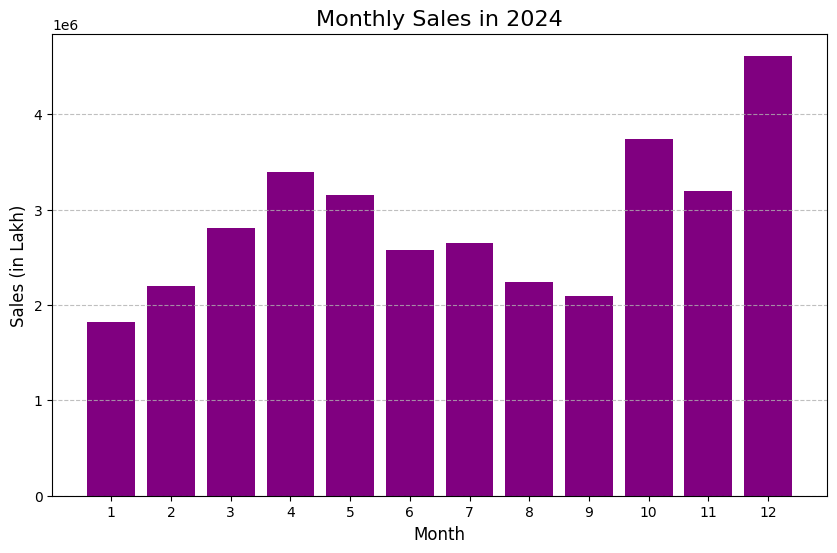

In [150]:
months = range(1, 13)


plt.figure(figsize=(10, 6))


plt.bar(months, results['Sales'], color='purple')
plt.grid(True, axis='y', linestyle='--', alpha=0.8)

plt.title('Monthly Sales in 2024', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales (in Lakh)', fontsize=12)
plt.xticks(months)
plt.show()

### Extract the city from the 'Purchase Address' column

In [151]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1].strip())


In [152]:
city_sale=all_data.groupby("City")[["Quantity Ordered", "Price Each", "Sales"]].sum()

city_sale

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta,16602,2779908.20,2795498.58
Austin,11153,1809873.61,1819581.75
Boston,22528,3637409.77,3661642.01
Dallas,16730,2752627.82,2767975.40
Los Angeles,33289,5421435.23,5452570.80
New York City,27932,4635370.83,4664317.43
Portland,14053,2307747.47,2320490.61
San Francisco,50239,8211461.74,8262203.91
Seattle,16553,2733296.01,2747755.48


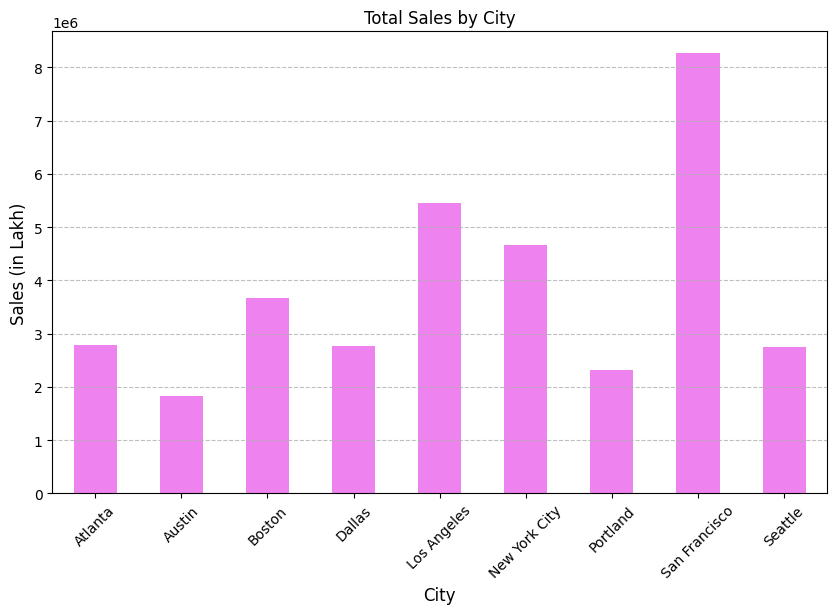

In [153]:
plt.figure(figsize=(10, 6))
city_sale['Sales'].plot(kind='bar', color='violet')
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.title('Total Sales by City')
plt.xlabel('City',fontsize=12)
plt.ylabel('Sales (in Lakh)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Extract the State from the 'Purchase Address' column

In [154]:
all_data['State'] = all_data['Purchase Address'].apply(lambda x: x.split(' ')[-2].strip())

In [155]:
state_sale=all_data.groupby("State")[["Quantity Ordered", "Price Each", "Sales"]].sum()

state_sale

,Quantity Ordered,Price Each,Sales
State,,,
CA,83528,13632896.97,13714774.71
GA,16602,2779908.20,2795498.58
MA,22528,3637409.77,3661642.01
ME,2750,447189.25,449758.27
NY,27932,4635370.83,4664317.43
OR,11303,1860558.22,1870732.34
TX,27883,4562501.43,4587557.15
WA,16553,2733296.01,2747755.48


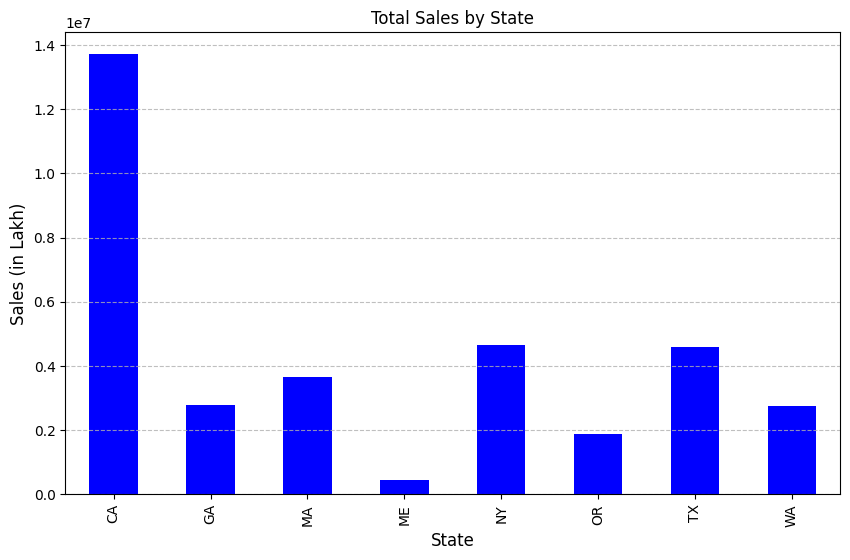

In [156]:
plt.figure(figsize=(10, 6))
state_sale['Sales'].plot(kind='bar', color='blue')
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.title('Total Sales by State')
plt.xlabel('State',fontsize=12)
plt.ylabel('Sales (in Lakh)', fontsize=12)
plt.show()

### Extract the Pincode from the 'Purchase Address' column

In [157]:
all_data['Pincode'] = all_data['Purchase Address'].apply(lambda x: x.split(' ')[-1].strip())

all_data.Pincode

0         75001
2         02215
3         90001
4         90001
5         90001
          ...  
186845    90001
186846    94016
186847    94016
186848    94016
186849    94016
Name: Pincode, Length: 185950, dtype: object

In [158]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Pincode
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,90001
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,CA,94016
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,99.99,Seattle,WA,98101
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta,GA,30301
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco,CA,94016
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,11.99,Boston,MA,02215


### Display Add at what time that customer see the Add and buy the product 

In [159]:
all_data["Order Date"]= pd.to_datetime(all_data["Order Date"])

C:\Users\shubh\AppData\Local\Temp\ipykernel_10944\3559148480.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data["Order Date"]= pd.to_datetime(all_data["Order Date"])


In [160]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute

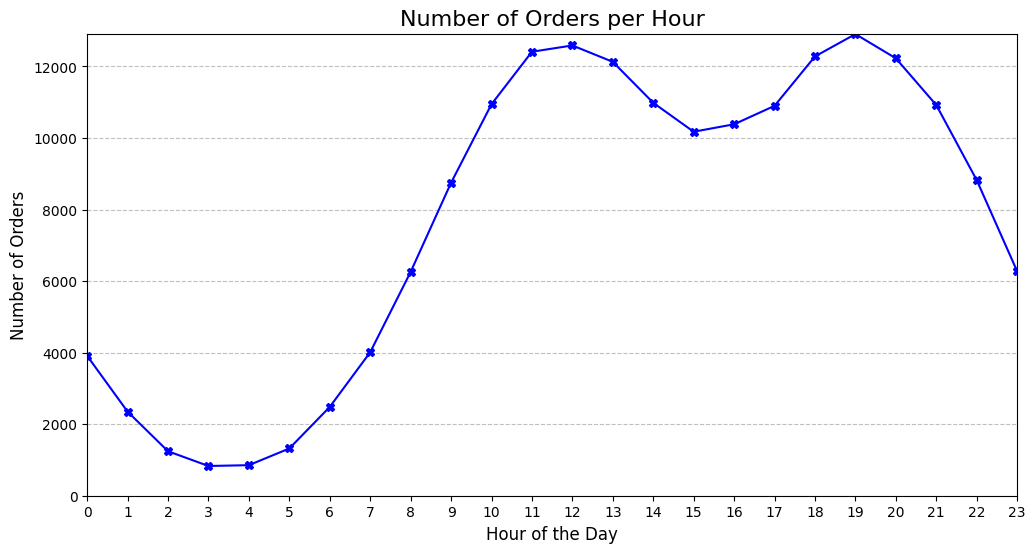

In [161]:

all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data['Hour'] = all_data['Order Date'].dt.hour

hourly_orders = all_data['Hour'].value_counts().sort_index()


plt.figure(figsize=(12, 6))


plt.plot(hourly_orders.index, hourly_orders.values, marker='X', linestyle='-', color='b')
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.title('Number of Orders per Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(range(0, 24))
plt.xlim(0, 23)
plt.ylim(0, max(hourly_orders.values) + 10)  


plt.show()


### Top 10 Best-selling Products

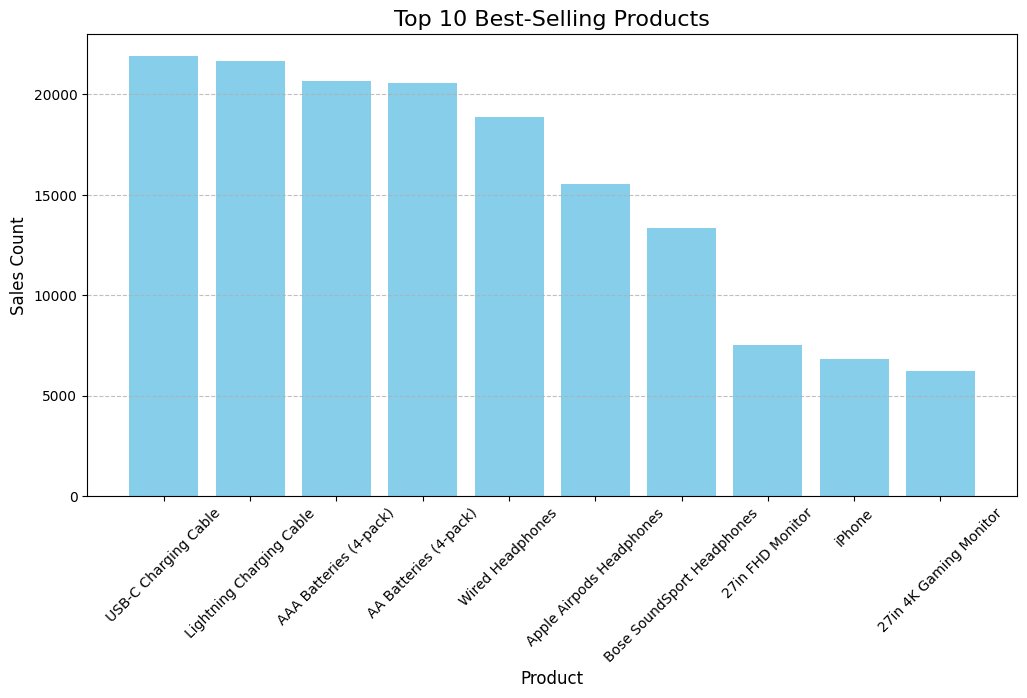

In [175]:



product_sales = all_data['Product'].value_counts().reset_index(name='Sales Count')
product_sales.columns = ['Product', 'Sales Count']

product_sales = product_sales.sort_values(by='Sales Count', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(product_sales['Product'][:10], product_sales['Sales Count'][:10], color='skyblue')
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.title('Top 10 Best-Selling Products', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Sales Count', fontsize=12)
plt.xticks(rotation=45)


plt.show()


### Products bought with same order id 

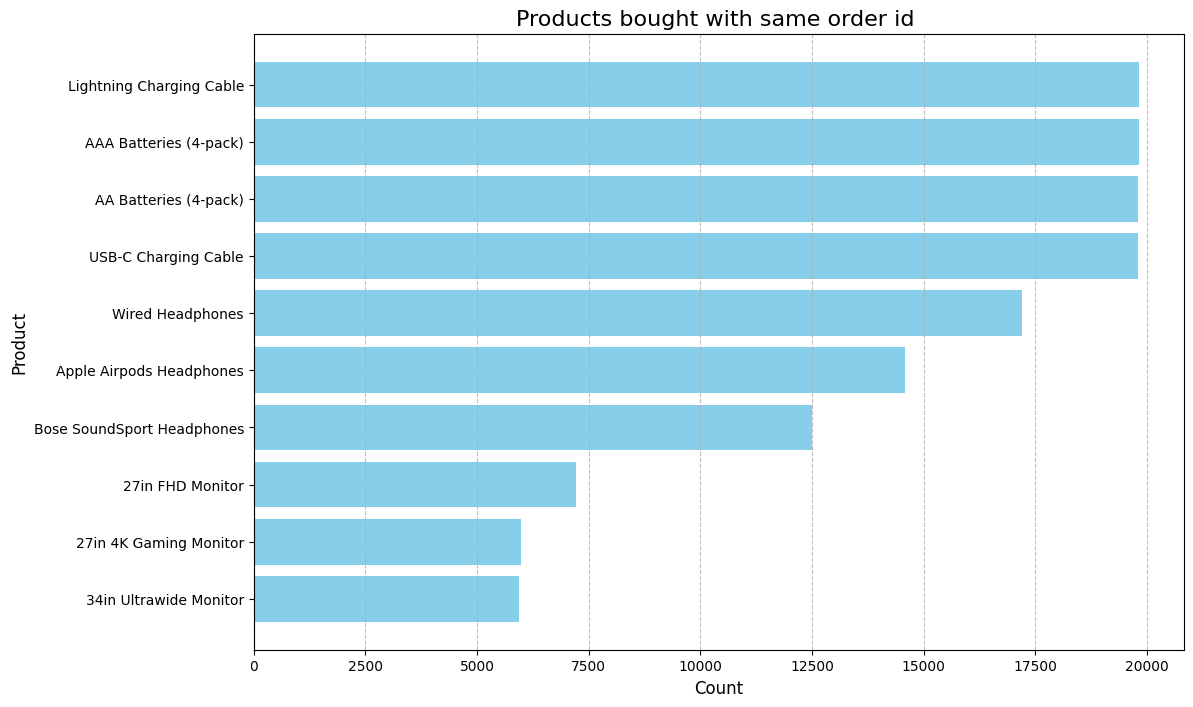

In [181]:



combined_products = all_data.groupby('Order ID')['Product'].apply(lambda x: ', '.join(x)).reset_index(name='Combined Products')


product_combination_counts = combined_products['Combined Products'].value_counts().reset_index(name='Count')


product_combination_counts.columns = ['Product', 'Count']





plt.figure(figsize=(12, 8))
plt.barh(product_combination_counts['Product'].head(10), product_combination_counts['Count'].head(10), color='skyblue')
plt.grid(True, axis='x', linestyle='--', alpha=0.8)
plt.title('Products bought with same order id ', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.gca().invert_yaxis()  

plt.show()
